# In this notebook I am using K nearest neighbor (KNN) classifier



***
The model will classify new clients for a large Telecom and whether they will Churn ro not. How loayl they will be to the company. 
***
I will also compare the results to a Logistic Regression classifier at the end


In [1]:
## I like to load all the libraries at the top so I can always check what I have or might need

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder, MinMaxScaler



In [2]:
### Upload the csv file there are several ways to do that on Colab, 
### easiest is to uplode it to your files on the side bar or write the below code

from google.colab import files
data = files.upload()

Saving churn_client_data GDN Ready.csv to churn_client_data GDN Ready.csv


In [3]:
### Uploading the data in a pandas dataframe 

tele_df = pd.read_csv('churn_client_data GDN Ready.csv', sep = ',')
pd.set_option('display.max_columns', None)

tele_df.head()

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,monthly,satisfaction,churn_value,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
0,0.00,0,0.094118,0,0,1,0,0,0.0,1,0.212935,0.50,1,0,0,1,0,0,0,0,0,0,0
1,0.00,1,0.200000,0,1,0,0,1,0.0,1,0.620896,0.50,1,1,0,0,1,0,0,0,0,0,1
2,0.25,1,0.611765,0,0,0,0,1,0.0,1,0.768159,0.25,1,0,0,0,1,0,0,0,0,1,0
3,0.25,0,0.141176,0,1,1,0,1,0.0,1,0.798507,0.25,1,0,0,0,1,0,0,0,1,0,0
4,0.50,1,0.164706,0,0,0,0,1,0.0,1,0.579602,0.25,1,0,0,0,1,0,0,0,1,0,0


In [14]:
round(tele_df.describe(),2)

###tele_df = tele_df.drop(columns='put the names of all columns to drop')

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,monthly,satisfaction,churn_value,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
count,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00
mean,0.43,0.42,0.24,0.29,0.34,0.34,0.29,0.67,0.38,0.59,0.46,0.56,0.27,0.39,0.05,0.23,0.43,0.22,0.07,0.12,0.06,0.09,0.11
std,0.40,0.49,0.24,0.45,0.48,0.48,0.45,0.47,0.42,0.49,0.30,0.30,0.44,0.49,0.23,0.42,0.50,0.41,0.26,0.32,0.24,0.28,0.32
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.17,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.25,0.00,0.20,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.52,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.75,1.00,0.32,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.71,0.75,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [4]:
### Show the unique values in each column 

df_uniques = pd.DataFrame([[x, len(tele_df[x].unique())] for x in tele_df.columns], columns=['Variable', 'Unique Values']).set_index('Variable')
df_uniques



,Unique Values
Variable,
months,5
multiple,2
gb_mon,50
security,2
backup,2
protection,2
support,2
unlimited,2
contract,3


In [5]:

tele_df['churn_value'].value_counts()


0    5174
1    1869
Name: churn_value, dtype: int64

In [50]:
### Splitting the data into training and testing sets 


y = 'churn_value'
y_label = tele_df[y]
x_features = tele_df.drop(columns = y)


x_train, x_test, y_train, y_test = train_test_split(x_features, y_label, train_size=0.6)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(4225, 22)
(4225,)
(2818, 22)
(2818,)


In [7]:
from sklearn.neighbors import KNeighborsClassifier


KNN = KNeighborsClassifier(n_neighbors=3).fit(x_train, y_train) 

y_predicted = KNN.predict(x_test)



In [8]:
### Let's check how accurate our model is! 

accuracy = round(accuracy_score(y_test, y_predicted),2)
f1 = round(f1_score(y_test, y_predicted),2)


print(classification_report(y_test, y_predicted))
print(f'The accuracy is {accuracy}')
print(f'The F1_score is {f1}')


              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2073
           1       0.81      0.72      0.76       745

    accuracy                           0.88      2818
   macro avg       0.85      0.83      0.84      2818
weighted avg       0.88      0.88      0.88      2818

The accuracy is 0.88
The F1_score is 0.76


In [9]:
### Using 5 neighbors to predict

KNN_5 = KNeighborsClassifier(n_neighbors=5, weights='distance').fit(x_train, y_train) 

y_predicted_5 = KNN_5.predict(x_test)

In [10]:
### Let's check how accurate our model is with 5 neighbors! 

accuracy_5 = round(accuracy_score(y_test, y_predicted_5),2)
f1_5 = round(f1_score(y_predicted_5, y_test ),2)


print(classification_report(y_test, y_predicted_5))
print(f'The accuracy is {accuracy_5}')
print(f'The F1_score is {f1_5}')

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      2073
           1       0.83      0.72      0.77       745

    accuracy                           0.89      2818
   macro avg       0.87      0.83      0.85      2818
weighted avg       0.88      0.89      0.88      2818

The accuracy is 0.89
The F1_score is 0.77


In [18]:
### Now I will create a loop to try find the best KNN value for my model

max_k = 40
f1_scores = []
accuracy = []
error_rates = []

for x in range(1,max_k):

  knn_x = KNeighborsClassifier(n_neighbors= x, weights='distance')
  knn_x = knn_x.fit(x_train,y_train)
  y_predict = knn_x.predict(x_test)

  f1_scores.append((x, round(f1_score(y_predict, y_test ),3)))
  accuracy.append((x, round(accuracy_score(y_test, y_predict),3)))
  error_rates.append((x, 1- round(accuracy_score(y_test, y_predict),3)))


f1_df_results = pd.DataFrame(f1_scores,columns=['K Number', 'F1 score'])
accuracy_df = pd.DataFrame(accuracy, columns=['K Number','Accuracy rate'])
error_rates_df = pd.DataFrame(error_rates, columns=['K Number','Error rate'])
    


In [13]:
error_rates_df['Error rate'].min()

0.09899999999999998

In [74]:

### Let's see the results in dataframe sorted by error rate from lowest
### we can see that k = 17 is optimal K value that gives the smallest error value



results_df = pd.concat([f1_df_results, accuracy_df, error_rates_df], axis=1, join='inner')

results_df.sort_values(['Error rate'], ascending=True).head(5)





,K Number,F1 score,K Number,Accuracy rate,K Number,Error rate
16,17,0.800,17,0.901,17,0.099
15,16,0.798,16,0.901,16,0.099
19,20,0.797,20,0.900,20,0.100
23,24,0.797,24,0.900,24,0.100
20,21,0.796,21,0.900,21,0.100


Text(0.5, 1.0, 'KNN values')

<Figure size 1800x1200 with 0 Axes>

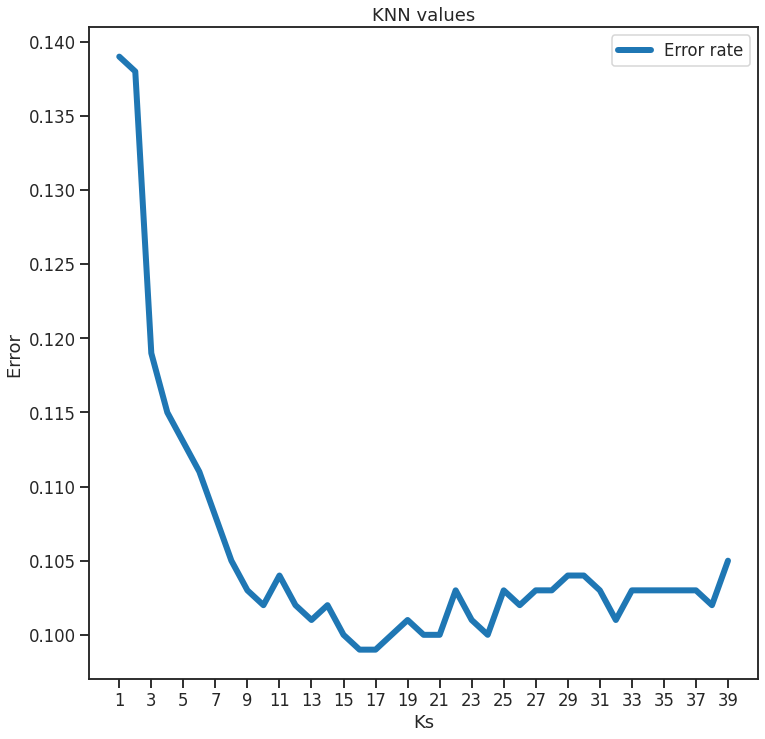

In [20]:
## I will plot the error rate to confirm the above results visually 

sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_rates_df.set_index('K Number').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='Ks', ylabel='Error ')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN values')

### We can see from the table that when K = 17 the model has the smallest error and best results in classifying the Churn label

In [23]:
### We can see from the table that when K = 17 the model has the smallest error and best results in classifying the Churn label
### so, I will show it below 

knn_17 = KNeighborsClassifier(n_neighbors=17, weights = 'distance').fit(x_train, y_train)
y_predict_17 = knn_17.predict(x_test)


accuracy_17 = round(accuracy_score(y_test, y_predict_17),2)
f1_17 = round(f1_score(y_predict_17, y_test ),2)


print(classification_report(y_test, y_predict_17))
print(f'The accuracy of my model is {accuracy_17}')
print(f'The F1_score my model is {f1_17}')

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2073
           1       0.86      0.74      0.80       745

    accuracy                           0.90      2818
   macro avg       0.89      0.85      0.87      2818
weighted avg       0.90      0.90      0.90      2818

The accuracy is 0.9
The F1_score is 0.8


In [47]:
### predict a particular client
# We have to reshape the arrays first to be the same as when model was trained


clint_n = 100
prediction = x_test.iloc[clint_n,:].values.reshape(1,-1)
reshaped_y = y_test.values.reshape(1,-1)

print(f'This client churn label is {knn_17.predict(prediction)}, the real label is {reshaped_y[0,clint_n]}')

This client churn label is [0], the real label is 0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [51]:
### Let's try to classify using Logistic Regression and see which model is a better classifier


lr = LogisticRegression(solver = 'liblinear').fit(x_train, y_train)

y_predict_lr = lr.predict(x_test)

accuracy_lr = round(accuracy_score(y_test, y_predict_lr),2)
f1_lr = round(f1_score(y_predict_lr, y_test ),2)


print(classification_report(y_test, y_predict_lr))
print(f'The accuracy of my model is {accuracy_lr}')
print(f'The F1_score my model is {f1_lr}')


              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2077
           1       0.91      0.87      0.89       741

    accuracy                           0.94      2818
   macro avg       0.93      0.92      0.93      2818
weighted avg       0.94      0.94      0.94      2818

The accuracy of my model is 0.94
The F1_score my model is 0.89


In [52]:
### We can see below that using logistic regression gives us a higher accuracy by 4%, thats a Notable difference


print(f'The accuracy of my model using Logistic Regression is {accuracy_lr}')
print(f'The accuracy of my model using KNN with optimal K value is {accuracy_17}')



The accuracy of my model using Logistic Regression is 0.94
The accuracy of my model using KNN with optimal K value is 0.9
